In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("Foreign_Exchange_Rates.csv")

print(df.head())
print(df.shape)
print(df.columns)

   Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$  \
0           0  2000-01-03                            1.5172   
1           1  2000-01-04                            1.5239   
2           2  2000-01-05                            1.5267   
3           3  2000-01-06                            1.5291   
4           4  2000-01-07                            1.5272   

  EURO AREA - EURO/US$ NEW ZEALAND - NEW ZELAND DOLLAR/US$  \
0               0.9847                              1.9033   
1                 0.97                              1.9238   
2               0.9676                              1.9339   
3               0.9686                              1.9436   
4               0.9714                               1.938   

  UNITED KINGDOM - UNITED KINGDOM POUND/US$ BRAZIL - REAL/US$  \
0                                    0.6146             1.805   
1                                    0.6109            1.8405   
2                                    0.6092          

In [2]:
#A. Explanatory Data Analysis (EDA)

In [3]:
df = df.drop(columns=df.columns[0])
df.head()

,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [4]:
new_col_names = ['Time Series', 'aud', 'eur', 'nzd', 'gbp', 'brl', 'cnd', 'cny', 'hkd', 'idr', 'krw', 'mxn', 'zar', 'sgd',\
                'dkk', 'jpy', 'myr', 'nok', 'sek', 'lkr', 'chf', 'twd', 'thb']
df.columns = new_col_names
df.columns

Index(['Time Series', 'aud', 'eur', 'nzd', 'gbp', 'brl', 'cnd', 'cny', 'hkd',
       'idr', 'krw', 'mxn', 'zar', 'sgd', 'dkk', 'jpy', 'myr', 'nok', 'sek',
       'lkr', 'chf', 'twd', 'thb'],
      dtype='object')

In [5]:
df.columns = map(str.upper, df.columns)
df.rename(columns=lambda x:x+'_USD', inplace=True)
df.rename(columns={'TIME SERIES_USD':'Time Series'}, inplace=True)

In [6]:
df.head(15)

,Time Series,AUD_USD,EUR_USD,NZD_USD,GBP_USD,BRL_USD,CND_USD,CNY_USD,HKD_USD,IDR_USD,...,SGD_USD,DKK_USD,JPY_USD,MYR_USD,NOK_USD,SEK_USD,LKR_USD,CHF_USD,TWD_USD,THB_USD
0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3
5,2000-01-10,1.5242,0.9754,1.935,0.6107,1.819,1.4568,8.2794,7.7785,43.55,...,1.6618,7.254,105.28,3.8,8.024,8.449,73.3,1.5704,30.83,37.27
6,2000-01-11,1.5209,0.9688,1.9365,0.6068,1.8225,1.457,8.2795,7.7785,43.6,...,1.669,7.214,106.09,3.8,7.969,8.397,73.35,1.5605,30.83,37.61
7,2000-01-12,1.5202,0.9727,1.9286,0.6073,1.835,1.455,8.2796,7.7787,43.6,...,1.669,7.236,105.76,3.8,7.977,8.418,73.35,1.566,30.8,37.54
8,2000-01-13,1.4954,0.9737,1.9084,0.6067,1.814,1.4495,8.2798,7.7788,43.55,...,1.67,7.252,106.09,3.8,7.9425,8.417,73.35,1.5707,30.8,37.49
9,2000-01-14,1.5004,0.9874,1.9186,0.6115,1.805,1.4497,8.2797,7.7789,43.55,...,1.6752,7.347,105.86,3.8,7.997,8.474,73.35,1.5945,30.83,37.55


In [7]:
df = df.replace('ND', np.nan)
df = df.dropna().reset_index(drop=True)
df.isna().sum()

Time Series    0
AUD_USD        0
EUR_USD        0
NZD_USD        0
GBP_USD        0
BRL_USD        0
CND_USD        0
CNY_USD        0
HKD_USD        0
IDR_USD        0
KRW_USD        0
MXN_USD        0
ZAR_USD        0
SGD_USD        0
DKK_USD        0
JPY_USD        0
MYR_USD        0
NOK_USD        0
SEK_USD        0
LKR_USD        0
CHF_USD        0
TWD_USD        0
THB_USD        0
dtype: int64

In [8]:
df.dtypes

Time Series    object
AUD_USD        object
EUR_USD        object
NZD_USD        object
GBP_USD        object
BRL_USD        object
CND_USD        object
CNY_USD        object
HKD_USD        object
IDR_USD        object
KRW_USD        object
MXN_USD        object
ZAR_USD        object
SGD_USD        object
DKK_USD        object
JPY_USD        object
MYR_USD        object
NOK_USD        object
SEK_USD        object
LKR_USD        object
CHF_USD        object
TWD_USD        object
THB_USD        object
dtype: object

In [9]:
#B. Data Visualisation

In [10]:
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
df['Time Series'] = pd.to_datetime(df['Time Series'])
df['month'] = df['Time Series'].dt.month
df['year'] = df['Time Series'].dt.year
df['month_year'] = df['Time Series'].dt.to_period('M')

In [12]:
df_groupby_aud = df.groupby('month_year').AUD_USD.mean().reset_index()
print(df_groupby_aud)

    month_year   AUD_USD
0      2000-01  1.524645
1      2000-02  1.593205
2      2000-03  1.641087
3      2000-04  1.677935
4      2000-05  1.729309
..         ...       ...
235    2019-08  1.476127
236    2019-09  1.467460
237    2019-10  1.471114
238    2019-11  1.464763
239    2019-12  1.452133

[240 rows x 2 columns]


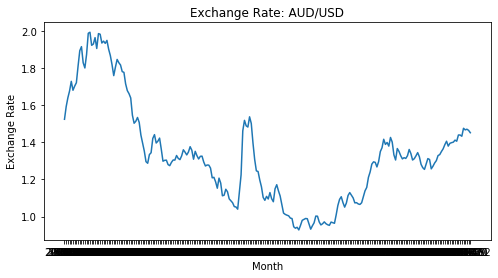

In [13]:
from matplotlib import pyplot as plt

x = df_groupby_aud['month_year'].astype(str)
y = df_groupby_aud['AUD_USD']

plt.figure(figsize=(8,4))
plt.plot(x, y)
plt.title("Exchange Rate: AUD/USD")
plt.xlabel("Month")
plt.ylabel("Exchange Rate")
plt.show()

In [14]:
groupby_all = df.groupby('month_year').apply(lambda x: pd.Series({
                                                    'AUD_mean': x['AUD_USD'].mean(),
                                                    'EUR_mean': x['EUR_USD'].mean(),
                                                    'NZD_mean': x['NZD_USD'].mean(),
                                                    'SGD_mean': x['SGD_USD'].mean(),
                                                    'GBP_mean': x['GBP_USD'].mean(),
                                                    'JPY_mean': x['JPY_USD'].mean(),
                                                    'CHF_mean': x['CHF_USD'].mean()
})).reset_index()

groupby_all = pd.DataFrame(groupby_all)

groupby_all['USD_mean'] = [1 for i in range(240)]
groupby_all.head()

,month_year,AUD_mean,EUR_mean,NZD_mean,SGD_mean,GBP_mean,JPY_mean,CHF_mean,USD_mean
0,2000-01,1.524645,0.987345,1.951050,1.675665,0.609620,105.296000,1.590260,1
1,2000-02,1.593205,1.017025,2.039655,1.702790,0.625020,109.388500,1.634770,1
2,2000-03,1.641087,1.037013,2.040430,1.715343,0.632948,106.307391,1.663617,1
3,2000-04,1.677935,1.058630,2.016400,1.709590,0.631990,105.627000,1.665650,1
4,2000-05,1.729309,1.104023,2.125468,1.728573,0.662927,108.320455,1.719009,1


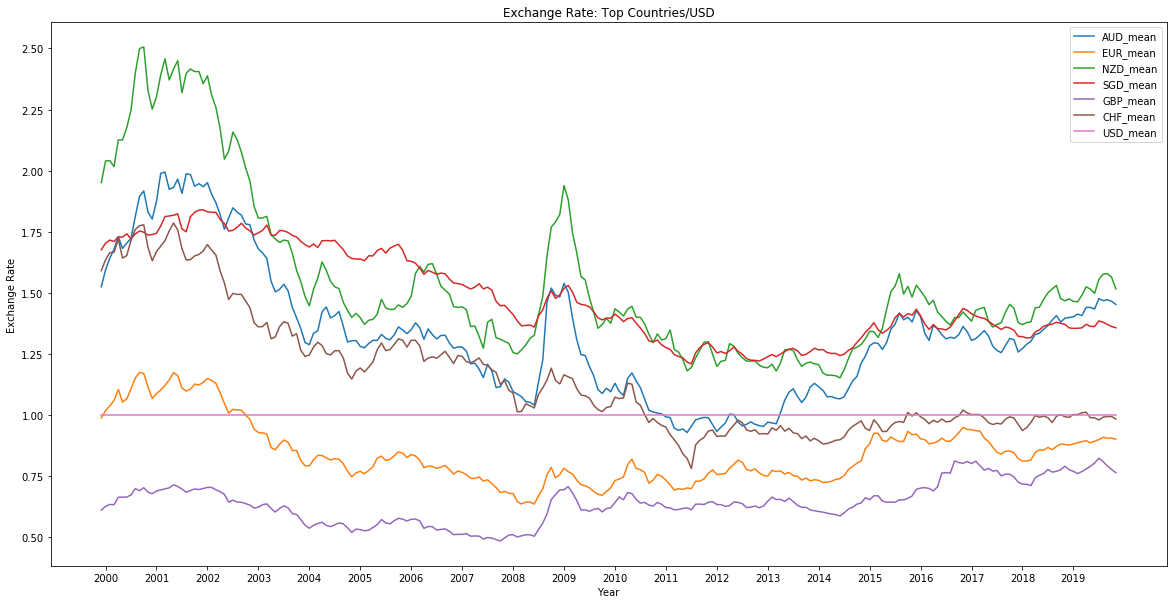

In [15]:
y_all = groupby_all[['AUD_mean', 'EUR_mean', 'NZD_mean', 'SGD_mean', 'GBP_mean', 'CHF_mean','USD_mean']]
labels = ["AUD_mean", "EUR_mean", "NZD_mean", "SGD_mean", "GBP_mean", "CHF_mean", "USD_mean"]
x_ticks = list(range(1, 240, 12))
x_ticklabels = [x for x in range(2000, 2021)]

plt.figure(figsize=(20,10))
ax = plt.subplot()

plt.plot(x, y_all)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)
plt.legend(labels)
plt.title("Exchange Rate: Top Countries/USD")
plt.xlabel("Year")
plt.ylabel("Exchange Rate")

plt.show()

In [16]:
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.models.annotations import Title
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.palettes import Spectral10

from datetime import datetime

groupby_all['month_year'] = groupby_all['month_year'].astype(str)
groupby_all['month_year'] = pd.to_datetime(groupby_all['month_year'])

source = ColumnDataSource(groupby_all)

output_notebook()

p = figure(plot_height = 500, \
           plot_width = 900, \
           x_axis_type = 'datetime')

p.line(x='month_year', y='AUD_mean', legend_label = 'AUD_mean', source=source, color=Spectral10[1], line_width=4)
p.line(x='month_year', y='EUR_mean', legend_label = 'EUR_mean', source=source, color=Spectral10[2], line_width=4)
p.line(x='month_year', y='NZD_mean', legend_label = 'NZD_mean', source=source, color=Spectral10[3], line_width=4)
p.line(x='month_year', y='SGD_mean', legend_label = 'SGD_mean', source=source, color=Spectral10[4], line_width=4)
p.line(x='month_year', y='GBP_mean', legend_label = 'GBP_mean', source=source, color=Spectral10[5], line_width=4)
p.line(x='month_year', y='USD_mean', legend_label = 'USD_mean', source=source, color=Spectral10[6], line_width=4)

p.xaxis[0].ticker.desired_num_ticks = 20

p.xaxis.axis_label = 'Year'
p.yaxis.axis_label = 'Exchange Rate'

t = Title()
t.text = 'Exchange Rate: Top Countries/USD'
p.title = t

hover = HoverTool(tooltips = [
                  ('AUD_Mean','@AUD_mean'),\
                  ('EUR_Mean', '@EUR_mean'),\
                  ('NZD_Mean', '@NZD_mean'),\
                  ('SGD_Mean', '@SGD_mean'),\
                  ('GBP_Mean', '@GBP_mean'),\
                  ('USD_Mean', '@USD_mean')])
p.add_tools(hover)
show(p)

Loading BokehJS ...

In [17]:
#C. Hypothesis Testing

In [18]:
aud_sgd = df.loc[:,['AUD_USD', 'SGD_USD']]
print(aud_sgd)

      AUD_USD  SGD_USD
0      1.5172   1.6563
1      1.5239   1.6535
2      1.5267   1.6560
3      1.5291   1.6655
4      1.5272   1.6625
...       ...      ...
5010   1.4445   1.3550
5011   1.4411   1.3540
5012   1.4331   1.3520
5013   1.4278   1.3483
5014   1.4225   1.3446

[5015 rows x 2 columns]


In [19]:
aud = np.array(aud_sgd.iloc[:,0])
sgd = np.array(aud_sgd.iloc[:,1])

import statsmodels.stats.power as sms
from statsmodels import stats

#find sample size through power analysis
n = sms.TTestPower().solve_power(0.3, power=0.9, alpha=0.05)
print(n)

118.68650942951783


In [20]:
#generate sample sets from population
aud_sample = np.random.choice(aud, size=118)
sgd_sample = np.random.choice(sgd, size=118)

print(np.array(list(zip(aud_sample, sgd_sample))))

[[1.9489 1.2789]
 [1.9095 1.7248]
 [1.0704 1.3509]
 [1.2796 1.5123]
 [1.3261 1.7207]
 [1.3118 1.378 ]
 [1.4006 1.6317]
 [1.5056 1.2777]
 [1.1972 1.748 ]
 [1.4482 1.6758]
 [1.2185 1.7409]
 [1.3943 1.786 ]
 [1.0699 1.2675]
 [1.0739 1.2708]
 [1.0697 1.714 ]
 [1.3924 1.2725]
 [0.9533 1.8236]
 [1.4019 1.3976]
 [1.9227 1.6902]
 [1.3873 1.7268]
 [1.0573 1.8367]
 [1.3738 1.3646]
 [0.9713 1.709 ]
 [1.3007 1.3087]
 [1.4219 1.2691]
 [1.3146 1.3395]
 [1.8155 1.4975]
 [1.2948 1.7592]
 [1.3837 1.5977]
 [1.115  1.509 ]
 [1.0838 1.3072]
 [1.2943 1.3563]
 [1.1091 1.638 ]
 [1.1707 1.716 ]
 [1.3217 1.3853]
 [1.3247 1.7038]
 [1.2932 1.4194]
 [1.3414 1.5145]
 [1.4552 1.7766]
 [1.368  1.4478]
 [1.3017 1.825 ]
 [1.3398 1.7598]
 [1.1566 1.2366]
 [1.3816 1.293 ]
 [1.2812 1.3755]
 [1.2541 1.5156]
 [1.2827 1.2675]
 [1.3257 1.3754]
 [1.9342 1.5885]
 [1.3761 1.7335]
 [1.8109 1.7672]
 [1.0786 1.3932]
 [1.4771 1.3641]
 [1.1977 1.3545]
 [1.0161 1.744 ]
 [1.3268 1.367 ]
 [1.3235 1.4182]
 [1.1425 1.7569]
 [1.0948 1.614

In [21]:
from scipy.stats import shapiro, pearsonr

#test normality of each sample set (H0: normally distributed)
stat, p1 = shapiro(aud_sample)
stat, p2 = shapiro(sgd_sample)
print(p1)
print(p2)

#test whether the sample sets are correlated or not (H0: not correlated)
stat, p3 = pearsonr(aud_sample, sgd_sample)
print(p3)

6.151520892672124e-07
2.954449200842646e-07
0.5571884026517472


In [22]:
#scipy
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(aud_sample, sgd_sample)
print('%.10f' %pval)

#statsmodels
import statsmodels.stats.api as sm
tstat, pval2, df = sm.ttest_ind(aud_sample, sgd_sample)
print('%.10f' %pval2)

0.0000002666
0.0000002666
